# Méthode RS

In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from time import process_time

In [33]:
# taille de la matrice : nombre de client + 1 (0: dépot) mij i->j
matrice_example = np.matrix([[0, 14, 18, 9, 5, 7], 
           [14, 0, 12, 4, 17, 1],
           [18, 12, 0, 3, 2, 1],
           [9, 4, 3, 0, 4, 8],
           [5, 17, 2, 4, 0, 11],
           [7, 1, 1, 8, 11, 0]])

In [34]:
sol_example = [[[1, 2], [5]], [[3, 4]]]

In [35]:
from itertools import combinations as comb
from copy import deepcopy

In [36]:
sol_example = [[1, 2, 5], [4, 3]]
sol_example2 = [[1, 3, 5], [2, 4]]
def cout(solution, matrice, w):
    K = len(solution)
    for route in solution:
        if (len(route) == 0):
            K -= 1
    sum_cost = 0
    for route in solution:
        if (len(route)):
            sum_cost += matrice[0, route[0]] # ajouter 0->premier el
            sum_cost += matrice[0, route[-1]] # ajouter dernier el->0
            for i in range(len(route)-1):
                sum_cost += matrice[route[i], route[i+1]]
    return K*w + sum_cost

(cout(sol_example, matrice_example, 18),cout(sol_example2, matrice_example, 18))

(88, 94)

In [37]:
def compute_capacities(route, capacities):
    total = 0
    for i in route:
        total += capacities[i-1]
    return total

def capacity_compatible(sol, capacities, max_capacity):
    for route in sol:
        total = compute_capacities(route, capacities)
        if (total > max_capacity):
            return False
    return True

max_capacity = 100
capacities_example = [20, 40, 50, 70, 30] # capacities for client n° 1, 2, 3, 4, 5
capacity_compatible([[1, 2, 5], [4, 3]],capacities_example, max_capacity)
capacity_compatible([[1, 2], [4, 5], [3]],capacities_example, max_capacity)

def filter_on_capacities(solutions, capacities, max_capacity):
    result = []
    for sol in solutions:
        if (capacity_compatible(sol[0], capacities, max_capacity)):
            result.append(sol)
    return result

filter_on_capacities([([[1, 2], [4, 5], [3]],15), ([[1, 2, 5], [4, 3]],25)],capacities_example, max_capacity)

[([[1, 2], [4, 5], [3]], 15)]

In [38]:
def exchange(solution, matrice, w, capacities, max_capacity):
    neighbours = []
    for combinaison in list(comb(enumerate(solution), 2)):
        for i in combinaison[0][1]:
            for j in combinaison[1][1]:
                tmp_sol = deepcopy(solution)
                pair0 = deepcopy(combinaison[0][1])     
                pair1 = deepcopy(combinaison[1][1])
                ind0 = combinaison[0][0]
                ind1 = combinaison[1][0]
                pair0.insert(pair0.index(i), j)
                pair0.remove(i)
                pair1.insert(pair1.index(j), i)
                pair1.remove(j)
                tmp_sol[ind0] = pair0
                tmp_sol[ind1] = pair1
                tmp_cost = cout(tmp_sol, matrice, w)
                # on définit un mouvement, par ("type d'opération", "index de la première paire", "index de la seconde paire", "élément 1 changé", "élément 2 changé")
                neighbours.append((tmp_sol,tmp_cost))
    neighbours = filter_on_capacities(neighbours, capacities, max_capacity)
    return neighbours
capacities_example = [20, 40, 50, 70, 30]
#exchange(sol_exemple, matrice_example, 5, capacities_example, max_capacity) 

In [39]:
def relocate(solution, matrice, w, capacities, max_capacity):
    neighbours = []
    combinations = list(comb(enumerate(solution), 2))
    

    for combinaison in combinations: 
        if (len(combinaison[0][1]) == 0):
            for j in combinaison[1][1]:
                tmp_sol = deepcopy(solution)
                pair0 = deepcopy(combinaison[0][1])     
                pair1 = deepcopy(combinaison[1][1])
                ind0 = combinaison[0][0]
                ind1 = combinaison[1][0]
                pair1.remove(j)
                pair0.insert(0, j)
                tmp_sol[ind0] = pair0
                tmp_sol[ind1] = pair1
                tmp_cost = cout(tmp_sol, matrice, w)
                neighbours.append((tmp_sol,tmp_cost))

        for i in combinaison[0][1]:
            for j in combinaison[1][1]:
                tmp_sol = deepcopy(solution)
                pair0 = deepcopy(combinaison[0][1])     
                pair1 = deepcopy(combinaison[1][1])
                ind0 = combinaison[0][0]
                ind1 = combinaison[1][0]
                pair1.remove(j)
                pair0.insert(pair0.index(i) + 1, j)
                tmp_sol[ind0] = pair0
                tmp_sol[ind1] = pair1
                tmp_cost = cout(tmp_sol, matrice, w)
                neighbours.append((tmp_sol,tmp_cost))

        if (len(combinaison[1][1]) == 0):
            for j in combinaison[0][1]:
                tmp_sol = deepcopy(solution)
                pair0 = deepcopy(combinaison[1][1])     
                pair1 = deepcopy(combinaison[0][1])
                ind0 = combinaison[1][0]
                ind1 = combinaison[0][0]
                pair1.remove(j)
                pair0.insert(0, j)
                tmp_sol[ind0] = pair0
                tmp_sol[ind1] = pair1
                tmp_cost = cout(tmp_sol, matrice, w)
                neighbours.append((tmp_sol,tmp_cost))

        for i in combinaison[1][1]:
            for j in combinaison[0][1]:
                tmp_sol = deepcopy(solution)
                pair0 = deepcopy(combinaison[1][1])     
                pair1 = deepcopy(combinaison[0][1])
                ind0 = combinaison[1][0]
                ind1 = combinaison[0][0]
                pair1.remove(j)
                pair0.insert(pair0.index(i) + 1, j)
                tmp_sol[ind0] = pair0
                tmp_sol[ind1] = pair1
                tmp_cost = cout(tmp_sol, matrice, w)
                neighbours.append((tmp_sol,tmp_cost))
        # à ce stade, il y a des redondances du fait des listes vides, mais vu qu'on va utiliser le max, on va avoir qu'une solution unique même si elles ont le mêmes coûts
    if (len(neighbours)):
        neighbours = filter_on_capacities(neighbours, capacities, max_capacity)

        # il serait peut-être nécessaire d'ajouter une fonction pour pouvoir explorer la solution avec ajout d'un camion à coup sûr
        if (len(neighbours) == 0):
            tmp_sol = deepcopy(solution)
            tmp_sol.append([])
            neighbours = relocate(tmp_sol, matrice, w, capacities, max_capacity)
    return neighbours

max_capacity=100
capacities_example = [20, 40, 50, 70, 30]
relocate([[1, 2, 5], [4, 3]], matrice_example, 5, capacities_example, max_capacity)  

[([[1, 2, 5], [3], [4]], 77), ([[1, 2, 5], [4], [3]], 77)]

In [40]:
tabu_list = []
def inverser(L,i,j):
    M=L.copy()
    M[j], M[i] = L[i], L[j]
    return M
def all_permutations(L):
    V=[]
    l=len(L)
    for i in range (l):
        for j in range (i+1,l):
            V.append(inverser(L,i,j))
    return(V)
def exchange_inside(solution, matrice, w, capacities, max_capacity):
    neighbours = []
    
    for i in range(len(solution)):
        route = solution[i]
        for permut in all_permutations(route):
            tmp_sol = deepcopy(solution)
            tmp_sol[i] = permut
            tmp_cost = cout(tmp_sol, matrice, w)
            neighbours.append((tmp_sol,tmp_cost))
        # à ce stade, il y a des redondances du fait des listes vides, mais vu qu'on va utiliser le max, on va avoir qu'une solution unique même si elles ont le mêmes coûts
    neighbours = filter_on_capacities(neighbours, capacities, max_capacity)
    return neighbours
capacities_example = [20, 40, 50, 70, 30]
exchange_inside([[1, 2, 5], [4, 3]], matrice_example, 5, capacities_example, max_capacity)

[]

In [41]:
def recuit(sol_init, matrice, w, t0, a, n_iter_cycle, capacities, max_capacity):
    best_sol = sol_init
    current_sol = sol_init
    best_sol_cost = cout(best_sol, matrice, w)
    current_sol_cost = best_sol_cost
    n_iter = 0
    start = process_time()
    cout_iter = []
    cout_best_iter = []
    temps_cout_iter = []
    n_iter_total = 0
    n_iter_total_list = []
    new_cycle = True
    t=t0
    while(new_cycle):
        n_iter=0
        new_cycle = False
        while n_iter < n_iter_cycle:
            n_iter_total += 1
            n_iter_total_list.append(n_iter_total)
            n_iter += 1
            tmp = relocate(current_sol, matrice, w, capacities, max_capacity) + exchange(current_sol, matrice, w, capacities, max_capacity) + exchange_inside(current_sol, matrice, w, capacities, max_capacity)
            if (len(tmp)):
                picked_sol = random.choice(tmp)
                df = cout(picked_sol[0], matrice, w) - cout(current_sol, matrice, w)
                if (df < 0):
                    current_sol = picked_sol[0]
                    current_sol_cost = cout(current_sol, matrice, w)
                    new_cycle = True
                else:
                    prob = np.exp(-df/t)
                    q = random.uniform(0, 1)
                    if (q < prob):
                        current_sol = picked_sol[0]
                        current_sol_cost = cout(current_sol, matrice, w)
                        new_cycle = True
                temps_cout_iter.append(process_time() - start)        
                if (current_sol_cost < best_sol_cost):
                    best_sol = current_sol
                    best_sol_cost = current_sol_cost

                cout_iter.append(cout(current_sol, matrice, w))
                cout_best_iter.append(cout(best_sol, matrice, w))    
          
            else:
                break
            print("best: {}, current: {}".format(best_sol_cost,current_sol_cost))
            
        t = a * t
    # plot1 : coût par itération 
    #plt.subplot(1,2,1)
    plt.plot(n_iter_total_list, cout_iter, 'b-', label="Cout_iter")
    plt.legend()
    plt.title("Coût RS par iteration")
    plt.xlabel("N. Iteration", fontsize=10)
    plt.xticks(rotation=90, fontsize=7)
    plt.ylabel("Coût")
    # x_major_locator = MultipleLocator(100)
    # y_major_locator = MultipleLocator(20)
    # ax = plt.gca()
    # ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)
    plt.show()    

    # plot2 : coût optimal par itération  
    #plt.subplot(1,2,2)      
    plt.plot(n_iter_total_list, cout_best_iter, 'r-', label="Best_Cout")
    plt.legend()
    plt.title("Coût optimal RS par iteration")
    plt.xlabel("N. Iteration")
    plt.xticks(rotation=90, fontsize=7)
    plt.ylabel("Coût optimal")
    # x_major_locator = MultipleLocator(100)
    # y_major_locator = MultipleLocator(5)
    # ax = plt.gca()
    # ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)
    plt.show() 

    #plot3: temps par cout courrent
    plt.plot(temps_cout_iter, cout_iter,'g-', label="Cout-Temps")
    plt.legend()
    plt.title("Temps pour trouver la solution courante RS")
    plt.xlabel("Temps")
    plt.xticks(rotation=90, fontsize=5)
    plt.ylabel("Coût")
    # x_major_locator = MultipleLocator(0.05)
    # y_major_locator = MultipleLocator(10)
    # ax = plt.gca()
    # ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)
    plt.show() 

    #plot4: temps par cout optimal
    plt.plot(temps_cout_iter, cout_best_iter,'y-', label="Cout Optimal-Temps")
    plt.legend()
    plt.title("Temps pour trouver la solution optimale RS")
    plt.xlabel("Temps")
    plt.ylabel("Coût optimal")
    plt.xticks(rotation=90, fontsize=5)
    # x_major_locator = MultipleLocator(0.05)
    # y_major_locator = MultipleLocator(5)
    # ax = plt.gca()
    # ax.xaxis.set_major_locator(x_major_locator)
    # ax.yaxis.set_major_locator(y_major_locator)
    # plt.figure(figsize=(15,15))    
    plt.show() 

    return best_sol, best_sol_cost
capacities_example = [20, 40, 50, 70, 30]


best: 102, current: 102
best: 95, current: 95
best: 95, current: 111
best: 95, current: 95
best: 95, current: 124
best: 95, current: 95
best: 81, current: 81
best: 81, current: 95
best: 81, current: 95
best: 81, current: 95
best: 78, current: 78
best: 78, current: 95
best: 78, current: 81
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 106
best: 77, current: 118
best: 77, current: 118
best: 77, current: 111
best: 77, current: 93
best: 77, current: 93
best: 77, current: 94
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 78
best: 77, current: 78
best: 77, current: 78
best: 77, current: 78
best: 77, current: 78
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
best: 77, current: 77
be

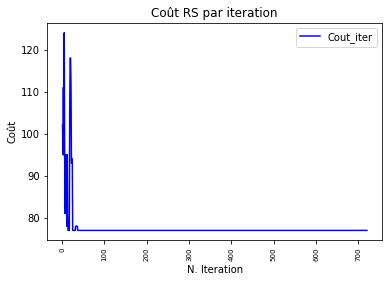

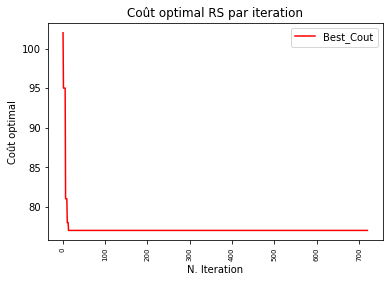

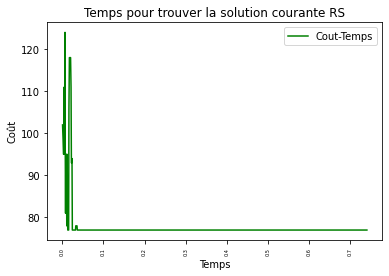

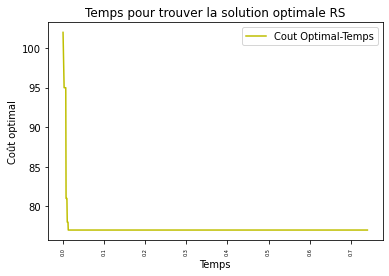

([[3], [], [4], [1, 5, 2]], 77)

In [42]:
recuit([[1], [4, 3], [2], [5]], matrice_example, 5, 200, 0.2, 10, capacities_example, max_capacity)

In [43]:
matrice_example2 =  np.matrix([
    [0, 14, 4, 5, 22, 6, 7, 9, 7, 7, 2, 13, 15, 12, 11, 17, 11, 4, 18, 9, 8, 10, 9, 25, 11, 20, 19, 23, 32, 21, 29, 34,
     20, 18, 27, 18, 21, 12, 9, 15, 11, 21, 23, 18, 16, 31, 23, 26, 21, 20, 12, 100],
    [14, 0, 12, 7, 9, 15, 18, 12, 11, 19, 7, 11, 9, 19, 21, 11, 16, 13, 19, 23, 17, 11, 22, 20, 11, 13, 11, 17, 8, 11,
     8, 29, 14, 7, 14, 12, 18, 19, 11, 21, 20, 15, 13, 18, 14, 29, 21, 17, 24, 21, 19, 31],
    [4, 12, 0, 11, 12, 17, 7, 6, 12, 9, 4, 17, 21, 8, 12, 15, 23, 22, 16, 14, 19, 10, 8, 5, 17, 11, 21, 25, 23, 22, 19,
     21, 21, 16, 15, 19, 29, 31, 16, 19, 11, 21, 20, 24, 19, 21, 22, 27, 29, 33, 16, 21],
    [5, 7, 11, 0, 8, 11, 16, 5, 9, 7, 12, 9, 11, 15, 19, 11, 14, 13, 17, 22, 29, 26, 19, 13, 16, 27, 25, 23, 11, 19, 21,
     8, 17, 10, 15, 18, 27, 23, 20, 16, 14, 19, 11, 13, 22, 21, 21, 30, 19, 27, 25, 14],
    [22, 9, 12, 8, 0, 7, 8, 4, 9, 14, 12, 11, 15, 17, 9, 15, 17, 11, 16, 10, 21, 30, 21, 16, 12, 11, 17, 13, 11, 19, 11,
     16, 9, 23, 21, 22, 14, 17, 13, 11, 14, 18, 24, 28, 29, 30, 21, 25, 16, 11, 17, 24],
    [6, 15, 17, 11, 7, 0, 6, 4, 6, 24, 11, 27, 15, 19, 21, 23, 12, 17, 19, 22, 14, 10, 22, 26, 21, 27, 16, 13, 14, 11,
     8, 6, 18, 11, 21, 27, 11, 29, 22, 12, 17, 8, 11, 21, 30, 12, 16, 29, 22, 11, 15, 19],
    [7, 18, 7, 16, 8, 6, 0, 12, 8, 15, 9, 22, 12, 11, 16, 9, 6, 12, 14, 21, 27, 11, 23, 26, 21, 25, 11, 10, 13, 9, 7,
     16, 15, 13, 19, 21, 22, 18, 13, 16, 12, 13, 19, 21, 22, 17, 21, 21, 29, 24, 19, 11],
    [9, 12, 6, 5, 4, 4, 12, 0, 12, 14, 4, 12, 7, 9, 12, 11, 16, 18, 14, 10, 21, 27, 11, 14, 16, 11, 19, 21, 28, 31, 21,
     22, 26, 16, 8, 11, 15, 24, 29, 21, 20, 16, 11, 9, 24, 22, 15, 18, 13, 16, 13, 16],
    [7, 11, 12, 9, 9, 6, 8, 12, 0, 21, 25, 17, 14, 6, 21, 9, 11, 19, 12, 17, 14, 21, 29, 16, 11, 12, 24, 11, 12, 15, 8,
     11, 23, 21, 35, 21, 22, 31, 29, 21, 17, 13, 8, 16, 15, 7, 21, 9, 15, 12, 22, 21],
    [7, 19, 9, 7, 14, 24, 15, 14, 21, 0, 12, 11, 6, 13, 11, 16, 12, 11, 8, 9, 12, 16, 19, 31, 25, 27, 12, 21, 20, 31,
     21, 26, 24, 21, 36, 22, 16, 7, 15, 13, 6, 17, 14, 8, 15, 17, 12, 11, 21, 27, 23, 20],
    [2, 7, 4, 12, 12, 11, 9, 4, 25, 12, 0, 6, 7, 16, 13, 9, 17, 13, 20, 25, 21, 11, 12, 16, 22, 21, 23, 29, 32, 10, 11,
     13, 16, 12, 6, 10, 32, 21, 19, 16, 11, 32, 21, 18, 14, 12, 14, 13, 8, 11, 23, 14],
    [13, 11, 17, 9, 11, 27, 22, 12, 17, 11, 6, 0, 9, 12, 13, 11, 14, 18, 21, 23, 22, 12, 10, 16, 12, 19, 9, 17, 7, 10,
     17, 13, 21, 17, 24, 16, 13, 20, 28, 21, 26, 21, 15, 19, 11, 12, 17, 21, 22, 11, 9, 17],
    [15, 9, 21, 11, 15, 15, 12, 7, 14, 6, 7, 9, 0, 21, 8, 13, 19, 27, 16, 13, 11, 21, 22, 28, 11, 13, 15, 9, 7, 13, 11,
     17, 19, 28, 14, 18, 14, 16, 15, 19, 16, 13, 16, 17, 13, 18, 11, 16, 19, 24, 28, 31],
    [12, 19, 8, 15, 17, 19, 11, 9, 6, 13, 16, 12, 21, 0, 21, 11, 20, 8, 6, 13, 12, 19, 23, 11, 14, 16, 11, 17, 16, 13,
     11, 10, 21, 22, 31, 26, 28, 23, 16, 14, 13, 10, 7, 13, 16, 13, 20, 25, 17, 25, 22, 13],
    [11, 21, 12, 19, 9, 21, 16, 12, 21, 11, 13, 13, 8, 21, 0, 9, 7, 11, 12, 11, 24, 21, 12, 16, 25, 21, 17, 14, 7, 10,
     14, 11, 14, 22, 31, 29, 21, 13, 15, 18, 11, 12, 17, 14, 12, 6, 11, 12, 23, 8, 4, 11],
    [17, 11, 15, 11, 15, 23, 9, 11, 9, 16, 9, 11, 13, 11, 9, 0, 11, 21, 21, 34, 22, 11, 12, 11, 11, 21, 14, 11, 13, 12,
     12, 13, 14, 16, 12, 21, 41, 22, 12, 12, 33, 11, 9, 14, 12, 12, 15, 13, 12, 14, 19, 21],
    [11, 16, 23, 14, 17, 12, 6, 16, 11, 12, 17, 14, 19, 20, 7, 11, 0, 9, 7, 10, 12, 16, 14, 14, 21, 32, 23, 17, 11, 37,
     21, 11, 13, 16, 11, 16, 10, 9, 17, 14, 15, 12, 21, 12, 16, 16, 14, 13, 15, 9, 5, 11],
    [4, 13, 22, 13, 11, 17, 12, 18, 19, 11, 13, 18, 27, 8, 11, 21, 9, 0, 12, 11, 14, 12, 21, 26, 21, 29, 21, 20, 21, 23,
     16, 12, 13, 18, 9, 21, 8, 12, 18, 7, 27, 21, 16, 13, 11, 21, 25, 28, 21, 13, 8, 10],
    [18, 19, 16, 17, 16, 19, 14, 14, 12, 8, 20, 21, 16, 6, 12, 21, 7, 12, 0, 16, 21, 14, 17, 11, 13, 9, 8, 10, 12, 17,
     14, 27, 21, 31, 22, 20, 21, 24, 25, 12, 17, 14, 6, 9, 18, 11, 15, 12, 17, 11, 12, 7],
    [9, 23, 14, 22, 10, 22, 21, 10, 17, 9, 25, 23, 13, 13, 11, 34, 10, 11, 16, 0, 12, 6, 12, 13, 18, 9, 6, 12, 10, 31,
     21, 11, 10, 7, 14, 17, 11, 19, 21, 11, 13, 18, 21, 22, 13, 14, 17, 11, 18, 10, 21, 11],
    [8, 17, 19, 29, 21, 14, 27, 21, 14, 12, 21, 22, 11, 12, 24, 22, 12, 14, 21, 12, 0, 7, 10, 8, 13, 11, 27, 21, 20, 11,
     17, 25, 27, 18, 21, 21, 18, 14, 8, 11, 9, 11, 8, 11, 14, 10, 12, 14, 11, 21, 9, 21],
    [10, 11, 10, 26, 30, 10, 11, 27, 21, 16, 11, 12, 21, 19, 21, 11, 16, 12, 14, 6, 7, 0, 21, 32, 11, 10, 8, 10, 12, 16,
     8, 19, 7, 12, 14, 16, 12, 11, 17, 23, 21, 25, 28, 31, 26, 13, 12, 16, 17, 12, 12, 11],
    [9, 22, 8, 19, 21, 22, 23, 11, 29, 19, 12, 10, 22, 23, 12, 12, 14, 21, 17, 12, 10, 21, 0, 10, 6, 17, 9, 10, 11, 16,
     12, 15, 17, 21, 11, 14, 12, 11, 26, 28, 22, 12, 11, 26, 13, 11, 11, 23, 8, 7, 19, 9],
    [25, 20, 5, 13, 16, 26, 26, 14, 16, 31, 16, 16, 28, 11, 16, 11, 14, 26, 11, 13, 8, 32, 10, 0, 12, 18, 15, 11, 11,
     17, 15, 12, 41, 9, 7, 10, 11, 15, 26, 21, 24, 15, 8, 12, 9, 13, 16, 12, 24, 11, 21, 27],
    [11, 11, 17, 16, 12, 21, 21, 16, 11, 25, 22, 12, 11, 14, 25, 11, 21, 21, 13, 18, 13, 11, 6, 12, 0, 11, 9, 11, 17,
     12, 14, 11, 21, 31, 12, 16, 11, 17, 12, 9, 7, 10, 9, 21, 14, 11, 13, 11, 21, 11, 10, 8],
    [20, 13, 11, 27, 11, 27, 25, 11, 12, 27, 21, 19, 13, 16, 21, 21, 32, 29, 9, 9, 11, 10, 17, 18, 11, 0, 8, 17, 15, 31,
     18, 11, 12, 16, 12, 17, 12, 21, 12, 14, 19, 12, 18, 11, 15, 14, 21, 18, 16, 12, 7, 12],
    [19, 11, 21, 25, 17, 16, 11, 19, 24, 12, 23, 9, 15, 11, 17, 14, 23, 21, 8, 6, 27, 8, 9, 15, 9, 8, 0, 21, 11, 11, 15,
     16, 12, 11, 14, 11, 19, 21, 14, 11, 19, 7, 9, 12, 15, 31, 21, 11, 21, 15, 17, 14],
    [23, 17, 25, 23, 13, 13, 10, 21, 11, 21, 29, 17, 9, 17, 14, 11, 17, 20, 10, 12, 21, 10, 10, 11, 11, 17, 21, 0, 10,
     9, 15, 11, 12, 6, 10, 21, 19, 8, 15, 14, 12, 10, 17, 9, 17, 12, 14, 16, 12, 17, 11, 22],
    [32, 8, 23, 11, 11, 14, 13, 28, 12, 20, 32, 7, 7, 16, 7, 13, 11, 21, 12, 10, 20, 12, 11, 11, 17, 15, 11, 10, 0, 9,
     12, 11, 12, 9, 10, 11, 12, 17, 9, 4, 15, 17, 15, 19, 11, 10, 9, 15, 16, 17, 15, 12],
    [21, 11, 22, 19, 19, 11, 9, 31, 15, 31, 10, 10, 13, 13, 10, 12, 37, 23, 17, 31, 11, 16, 16, 17, 12, 31, 11, 9, 9, 0,
     11, 21, 21, 17, 14, 21, 18, 11, 17, 13, 15, 11, 27, 10, 11, 12, 16, 14, 11, 12, 9, 8],
    [29, 8, 19, 21, 11, 8, 7, 21, 8, 21, 11, 17, 11, 11, 14, 12, 21, 16, 14, 21, 17, 8, 12, 15, 14, 18, 15, 15, 12, 11,
     0, 12, 13, 16, 9, 7, 11, 10, 7, 13, 11, 25, 11, 11, 15, 9, 7, 19, 8, 6, 10, 12],
    [34, 29, 21, 8, 16, 6, 16, 22, 11, 26, 13, 13, 17, 10, 11, 13, 11, 12, 27, 11, 25, 19, 15, 12, 11, 11, 16, 11, 11,
     21, 12, 0, 14, 9, 8, 21, 25, 32, 15, 11, 12, 10, 11, 15, 14, 8, 9, 19, 13, 12, 10, 11],
    [20, 14, 21, 17, 9, 18, 15, 26, 23, 24, 16, 21, 19, 21, 14, 14, 13, 13, 21, 10, 27, 7, 17, 41, 21, 12, 12, 12, 12,
     21, 13, 14, 0, 21, 13, 9, 6, 17, 8, 18, 7, 9, 10, 12, 12, 5, 14, 12, 12, 13, 11, 19],
    [18, 7, 16, 10, 23, 11, 13, 16, 21, 21, 12, 17, 28, 22, 22, 16, 16, 18, 31, 7, 18, 12, 21, 9, 31, 16, 11, 6, 9, 17,
     16, 9, 21, 0, 11, 13, 4, 9, 8, 15, 11, 12, 14, 11, 12, 18, 17, 11, 12, 14, 11, 12],
    [27, 14, 15, 15, 21, 21, 19, 8, 35, 36, 6, 24, 14, 31, 31, 12, 11, 9, 22, 14, 21, 14, 11, 7, 12, 12, 14, 10, 10, 14,
     9, 8, 13, 11, 0, 12, 10, 9, 4, 13, 11, 18, 25, 28, 29, 12, 11, 16, 18, 12, 10, 9],
    [18, 12, 19, 18, 22, 27, 21, 11, 21, 22, 10, 16, 18, 26, 29, 21, 16, 21, 20, 17, 21, 16, 14, 10, 16, 17, 11, 21, 11,
     21, 7, 21, 9, 13, 12, 0, 11, 8, 9, 16, 11, 10, 10, 11, 17, 16, 12, 7, 9, 14, 11, 7],
    [21, 18, 29, 27, 14, 11, 22, 15, 22, 16, 32, 13, 14, 28, 21, 41, 10, 8, 21, 11, 18, 12, 12, 11, 11, 12, 19, 19, 12,
     18, 11, 25, 6, 4, 10, 11, 0, 12, 8, 9, 13, 11, 5, 11, 12, 11, 16, 9, 10, 13, 7, 14],
    [12, 19, 31, 23, 17, 29, 18, 24, 31, 7, 21, 20, 16, 23, 13, 22, 9, 12, 24, 19, 14, 11, 11, 15, 17, 21, 21, 8, 17,
     11, 10, 32, 17, 9, 9, 8, 12, 0, 9, 11, 15, 22, 26, 21, 18, 12, 17, 16, 11, 12, 14, 11],
    [9, 11, 16, 20, 13, 22, 13, 29, 29, 15, 19, 28, 15, 16, 15, 12, 17, 18, 25, 21, 8, 17, 26, 26, 12, 12, 14, 15, 9,
     17, 7, 15, 8, 8, 4, 9, 8, 9, 0, 13, 18, 14, 11, 18, 13, 12, 16, 18, 15, 13, 11, 15],
    [15, 21, 19, 16, 11, 12, 16, 21, 21, 13, 16, 21, 19, 14, 18, 12, 14, 7, 12, 11, 11, 23, 28, 21, 9, 14, 11, 14, 4,
     13, 13, 11, 18, 15, 13, 16, 9, 11, 13, 0, 10, 17, 11, 13, 6, 9, 16, 11, 12, 11, 21, 24],
    [11, 20, 11, 14, 14, 17, 12, 20, 17, 6, 11, 26, 16, 13, 11, 33, 15, 27, 17, 13, 9, 21, 22, 24, 7, 19, 19, 12, 15,
     15, 11, 12, 7, 11, 11, 11, 13, 15, 18, 10, 0, 11, 5, 18, 9, 6, 12, 10, 9, 8, 11, 27],
    [21, 15, 21, 19, 18, 8, 13, 16, 13, 17, 32, 21, 13, 10, 12, 11, 12, 21, 14, 18, 11, 25, 12, 15, 10, 12, 7, 10, 17,
     11, 25, 10, 9, 12, 18, 10, 11, 22, 14, 17, 11, 0, 11, 15, 12, 25, 18, 13, 12, 16, 11, 12],
    [23, 13, 20, 11, 24, 11, 19, 11, 8, 14, 21, 15, 16, 7, 17, 9, 21, 16, 6, 21, 8, 28, 11, 8, 9, 18, 9, 17, 15, 27, 11,
     11, 10, 14, 25, 10, 5, 26, 11, 11, 5, 11, 0, 14, 15, 11, 8, 10, 8, 9, 11, 26],
    [18, 18, 24, 13, 28, 21, 21, 9, 16, 8, 18, 19, 17, 13, 14, 14, 12, 13, 9, 22, 11, 31, 26, 12, 21, 11, 12, 9, 19, 10,
     11, 15, 12, 11, 28, 11, 11, 21, 18, 13, 18, 15, 0, 0, 19, 11, 21, 9, 24, 11, 14, 11],
    [16, 14, 19, 22, 29, 30, 22, 24, 15, 15, 14, 11, 13, 16, 12, 12, 16, 11, 18, 13, 14, 26, 13, 9, 14, 15, 15, 17, 11,
     11, 15, 14, 12, 12, 29, 17, 12, 18, 13, 6, 9, 12, 0, 19, 0, 21, 6, 9, 11, 14, 8, 10],
    [31, 29, 21, 21, 30, 12, 17, 22, 7, 17, 12, 12, 18, 13, 6, 12, 16, 21, 11, 14, 10, 13, 11, 13, 11, 14, 31, 12, 10,
     12, 9, 8, 5, 18, 12, 16, 11, 12, 12, 9, 6, 25, 0, 11, 21, 0, 9, 7, 8, 13, 11, 21],
    [23, 21, 22, 21, 21, 16, 21, 15, 21, 12, 14, 17, 11, 20, 11, 15, 14, 25, 15, 17, 12, 12, 11, 16, 13, 21, 21, 14, 9,
     16, 7, 9, 14, 17, 11, 12, 16, 17, 16, 16, 12, 18, 0, 21, 6, 9, 0, 11, 14, 7, 9, 22],
    [26, 17, 27, 30, 25, 29, 21, 18, 9, 11, 13, 21, 16, 25, 12, 13, 13, 28, 12, 11, 14, 16, 23, 12, 11, 18, 11, 16, 15,
     14, 19, 19, 12, 11, 16, 7, 9, 16, 18, 11, 10, 13, 0, 9, 9, 7, 11, 0, 9, 14, 12, 12],
    [21, 24, 29, 19, 16, 22, 29, 13, 15, 21, 8, 22, 19, 17, 23, 12, 15, 21, 17, 18, 11, 17, 8, 24, 21, 16, 21, 12, 16,
     11, 8, 13, 12, 12, 18, 9, 10, 11, 15, 12, 9, 12, 0, 24, 11, 8, 14, 9, 0, 5, 15, 10],
    [20, 21, 33, 27, 11, 11, 24, 16, 12, 27, 11, 11, 24, 25, 8, 14, 9, 13, 11, 10, 21, 12, 7, 11, 11, 12, 15, 17, 17,
     12, 6, 12, 13, 14, 12, 14, 13, 12, 13, 11, 8, 16, 0, 11, 14, 13, 7, 14, 5, 0, 14, 7],
    [12, 19, 16, 25, 17, 15, 19, 13, 22, 23, 23, 9, 28, 22, 4, 19, 5, 8, 12, 21, 9, 12, 19, 21, 10, 7, 17, 11, 15, 9,
     10, 10, 11, 11, 10, 11, 7, 14, 11, 21, 11, 11, 0, 14, 8, 11, 9, 12, 15, 14, 0, 6],
    [100, 31, 21, 14, 24, 19, 11, 16, 21, 20, 14, 17, 31, 13, 11, 21, 11, 10, 7, 11, 21, 11, 9, 27, 8, 12, 14, 22, 12,
     8, 12, 11, 19, 12, 9, 7, 14, 11, 15, 24, 27, 12, 0, 11, 10, 21, 22, 12, 10, 7, 6, 0]])

best: 762, current: 804
best: 762, current: 826
best: 762, current: 854
best: 762, current: 795
best: 762, current: 792
best: 762, current: 817
best: 762, current: 844
best: 762, current: 862
best: 762, current: 895
best: 762, current: 901
best: 762, current: 887
best: 762, current: 915
best: 762, current: 936
best: 762, current: 904
best: 762, current: 878
best: 762, current: 898
best: 762, current: 903
best: 762, current: 930
best: 762, current: 935
best: 762, current: 944
best: 762, current: 925
best: 762, current: 955
best: 762, current: 1015
best: 762, current: 1029
best: 762, current: 923
best: 762, current: 923
best: 762, current: 923
best: 762, current: 923
best: 762, current: 928
best: 762, current: 925
best: 762, current: 924
best: 762, current: 924
best: 762, current: 924
best: 762, current: 923
best: 762, current: 913
best: 762, current: 913
best: 762, current: 913
best: 762, current: 918
best: 762, current: 918
best: 762, current: 909
best: 762, current: 909
best: 762, cur

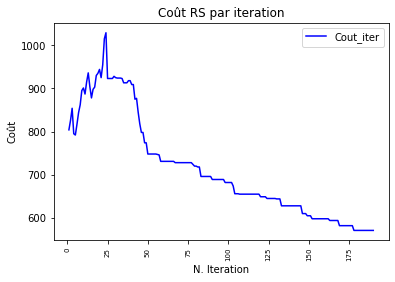

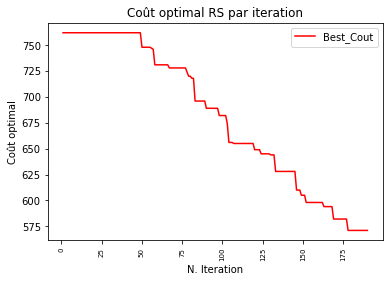

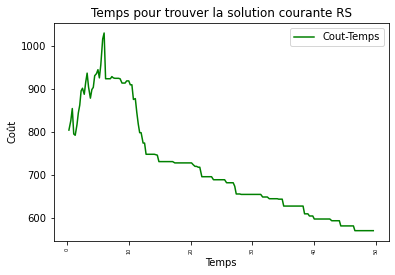

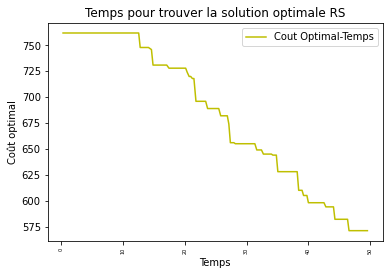

([[2, 34, 29, 1, 4, 40, 41, 13],
  [22,
   32,
   37,
   30,
   35,
   46,
   44,
   24,
   39,
   36,
   50,
   27,
   33,
   21,
   25,
   38,
   28,
   16,
   15,
   23,
   49,
   42,
   20,
   12,
   10,
   48,
   45,
   11,
   8,
   18,
   51,
   31,
   5,
   6,
   43,
   47,
   26,
   19],
  [],
  [9, 14],
  [17, 7, 3],
  [],
  [],
  []],
 571)

In [44]:
sol_example = [[3, 1, 8, 5, 7, 12, 10, 13, 42], [22, 2, 15, 11, 49, 16, 17, 39, 28, 29, 27, 33, 36, 38, 34, 23, 20, 21, 19, 26, 41, 32, 45, 14, 4, 6, 30, 35, 47, 43, 9, 40, 24, 50, 25, 51], [37], [48], [18], [31], [44], [46]]
capacities_example = [1]*51
max_capacity = 100
recuit(sol_example, matrice_example2, 5, 2000, 0.2, 10, capacities_example, max_capacity)

best: 794, current: 822
best: 794, current: 825
best: 794, current: 857
best: 794, current: 874
best: 794, current: 906
best: 794, current: 926
best: 794, current: 916
best: 794, current: 926
best: 794, current: 903
best: 794, current: 859
best: 794, current: 897
best: 794, current: 905
best: 794, current: 893
best: 794, current: 872
best: 794, current: 903
best: 794, current: 897
best: 794, current: 913
best: 794, current: 917
best: 794, current: 942
best: 794, current: 966
best: 794, current: 965
best: 794, current: 978
best: 794, current: 989
best: 794, current: 990
best: 794, current: 992
best: 794, current: 996
best: 794, current: 972
best: 794, current: 969
best: 794, current: 963
best: 794, current: 971
best: 794, current: 969
best: 794, current: 961
best: 794, current: 961
best: 794, current: 961
best: 794, current: 961
best: 794, current: 949
best: 794, current: 947
best: 794, current: 947
best: 794, current: 927
best: 794, current: 922
best: 794, current: 922
best: 794, curre

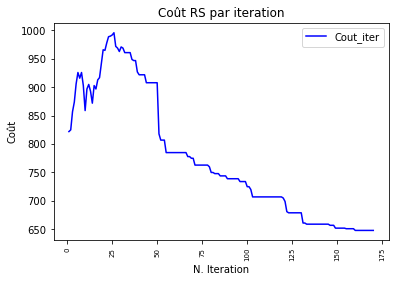

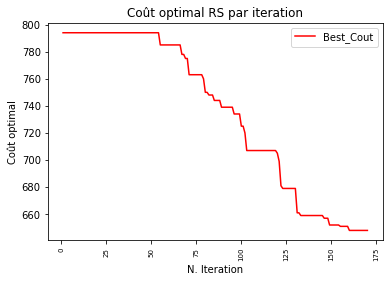

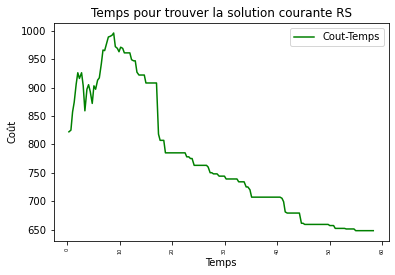

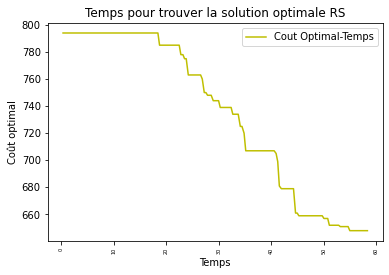

([[1, 4, 5, 13, 38, 33, 31, 27, 42, 18],
  [48, 49, 46, 44, 51, 34, 23, 22, 37, 9],
  [17, 16, 47, 20, 19, 21],
  [26, 41, 50, 14],
  [],
  [3, 15, 12, 8, 2, 40, 24],
  [6, 32, 25, 10],
  [7, 43, 11, 29, 28, 35, 30, 45, 36, 39]],
 648)

In [45]:
sol_example = [[3, 1, 8, 5, 7, 12, 10, 13, 42], [33, 36, 38, 34, 23, 20, 21, 19], [37, 47, 50, 25, 51], [48, 26, 41, 32, 45, 14], [18], [31, 43, 9, 40, 24], [44, 4, 6, 30, 35], [46, 22, 2, 15, 11, 49, 16, 17, 39, 28, 29, 27]]
capacities_example = [3]*51
max_capacity = 100
recuit(sol_example, matrice_example2, 5, 2000, 0.2, 10, capacities_example, max_capacity)